In [ ]:
import tweepy
import pandas as pd
api = '5s8IZzv4TUf5T5z8nXxX1sBm4'
api_secret = 'lfTQIZcqudt3Nr27z2Id0raYzuQ10qrWv3Zkm9rjQXZc8sXUQb'
tkn = '1293762770031190021-cMc5CyNq4H5dugJZ8VHsqP5cl5WVGw'
tkn_secret = 'y1t9kmAwpqSde6n85Xe3LTh4HFbvWc6hTb4z7mk1OQXZ5'

authentication = tweepy.OAuthHandler(api, api_secret)
authentication.set_access_token(tkn, tkn_secret)

getapi = tweepy.API(authentication)

tweet=tweepy.Cursor(getapi.search_tweets,q='Spiderman',count=100,lang='en').items(300)

Column_name = ['Twitter ID', 'Tweet']
Tweets = []

for i in tweet:
  Tweets.append([i.user.screen_name, i.text])

Twitter_Data = pd.DataFrame(Tweets, columns=Column_name)

Twitter_Data
Twitter_Data.to_csv("Twitter Data.csv")

In [ ]:
from textblob import TextBlob

def Polarity (text):
    return TextBlob(text).sentiment.polarity

def Subjectivity (text):
    return TextBlob(text).sentiment.subjectivity

Twitter_Data['Polarity']=Twitter_Data['Tweet'].apply(Polarity)
Twitter_Data['Subjectivity']=Twitter_Data['Tweet'].apply(Subjectivity)
Twitter_Data

,Twitter ID,Tweet,Polarity,Subjectivity
0,BuyyarapuVishal,@ScreenRogue 1 batman begins\n2 man of steel\n...,0.000000,0.000000
1,IRENEhan_,"RT @eternallyksw: ☀️ ah right, we became an am...",0.442857,0.717857
2,BrownBlue1976,@9oldendragon @ellensunden2 @JilldarB @gretat_...,0.000000,0.000000
3,NIGHTCLOCKSHOW,RT @thealexrossart: TGIF #SpiderMan https://t....,0.000000,0.000000
4,ImAbigail666,"@JoshuaM37848390 Batman is more intimidating, ...",0.000000,0.750000
...,...,...,...,...
295,ampmars,amazing spiderman best spiderman movies i'm so...,0.800000,0.600000
296,Animator2k,@ComicLoverMari Honestly spiderman is scarier ...,0.275000,0.725000
297,easyliveauction,M&amp;M Auctions LTD\nLIVE #Auction 15th Apr @...,0.136364,0.500000
298,Jinxikers,@lyechanz @xikers_official jUNGHOON SKIN SPIDE...,0.000000,0.000000


In [ ]:
Verdict = lambda x: "Negative" if x < 0 else ("Neutral" if x==0 else "Positive")
Twitter_Data['Analysis']=Twitter_Data['Polarity'].apply(Verdict)
Twitter_Data

,Twitter ID,Tweet,Polarity,Subjectivity,Analysis
0,BuyyarapuVishal,@ScreenRogue 1 batman begins\n2 man of steel\n...,0.000000,0.000000,Neutral
1,IRENEhan_,"RT @eternallyksw: ☀️ ah right, we became an am...",0.442857,0.717857,Positive
2,BrownBlue1976,@9oldendragon @ellensunden2 @JilldarB @gretat_...,0.000000,0.000000,Neutral
3,NIGHTCLOCKSHOW,RT @thealexrossart: TGIF #SpiderMan https://t....,0.000000,0.000000,Neutral
4,ImAbigail666,"@JoshuaM37848390 Batman is more intimidating, ...",0.000000,0.750000,Neutral
...,...,...,...,...,...
295,ampmars,amazing spiderman best spiderman movies i'm so...,0.800000,0.600000,Positive
296,Animator2k,@ComicLoverMari Honestly spiderman is scarier ...,0.275000,0.725000,Positive
297,easyliveauction,M&amp;M Auctions LTD\nLIVE #Auction 15th Apr @...,0.136364,0.500000,Positive
298,Jinxikers,@lyechanz @xikers_official jUNGHOON SKIN SPIDE...,0.000000,0.000000,Neutral


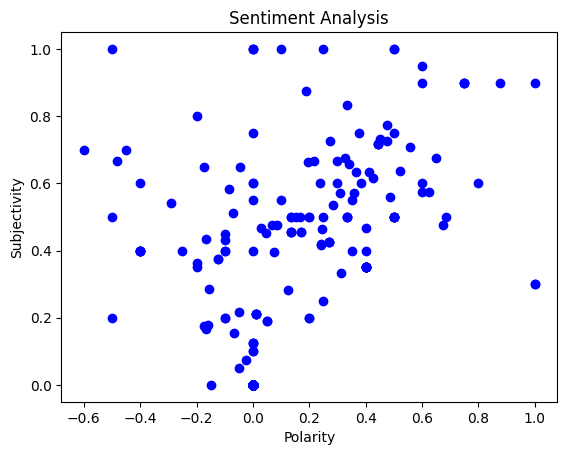

In [ ]:
import matplotlib.pyplot as plt
for x in range(0, Twitter_Data.shape[0]):
  plt.scatter(Twitter_Data['Polarity'][x], Twitter_Data [ 'Subjectivity'][x], color='blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()